In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.datasets import make_moons

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 1 : Create clustering data using make_blobs

In [2]:
X,y = make_moons(n_samples=1000, noise = 0.05)

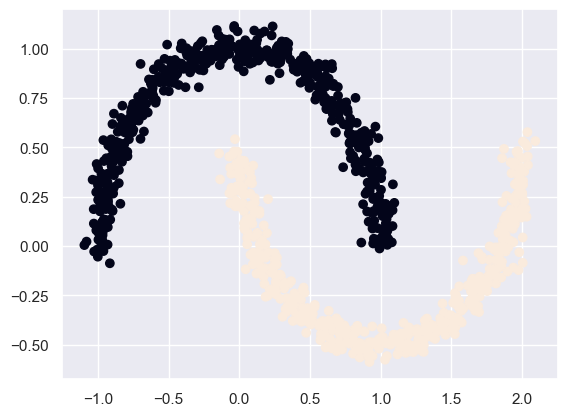

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

## Step 2 : Do Standard scaling

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 3 : Load the DBSCAN Model

In [5]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3)
dbscan.fit(X_scaled)

DBSCAN(eps=0.3)

In [6]:
dbscan.labels_

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,

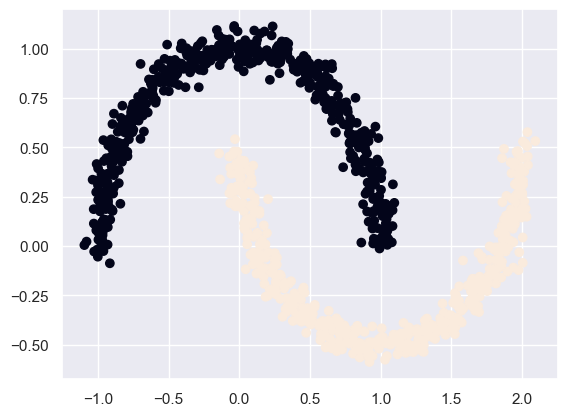

In [7]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)

## Step 4 : Find the best values of Epsilon and Min_samples for your data

In [8]:
from sklearn.metrics import silhouette_score

eps_range = np.arange(0.1, 1.0, 0.05)
min_samples_range = range(3, 10)

best_score = -1
best_params = {}
results = []

for eps in eps_range:
    for min_samples in min_samples_range:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X_scaled)

        # Skip if only one cluster or all noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters <= 1:
            continue

        score = silhouette_score(X, labels)
        results.append((eps, min_samples, score, n_clusters))

        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f"\nBest Silhouette Score: {best_score:.4f}")
print(f"Best Parameters: {best_params}")


Best Silhouette Score: 0.3333
Best Parameters: {'eps': 0.15000000000000002, 'min_samples': 3}


In [9]:
# df = pd.DataFrame(results, columns=['eps', 'min_samples', 'score', 'n_clusters'])
# heatmap_data = df.pivot(index='min_samples', columns='eps', values='score')

# plt.figure(figsize=(10, 6))
# sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis")
# plt.title("Silhouette Score Heatmap for DBSCAN")
# plt.xlabel("Epsilon")
# plt.ylabel("Min Samples")
# plt.tight_layout()
# plt.show()